<h2>5 classes classification without considering toxicity features</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.svm import LinearSVC, SVC
import time

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint, loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../file_csv/df_users_annotated_10.csv")

In [4]:
df = df.rename(columns={"cluster_0": "extreme_toxic_group", "cluster_2":"moderated_toxic_group", "cluster_3":"obscene_toxic_group"})

In [5]:
df.drop(columns=["toxicity_mean", "toxicity_sum", "toxicity_min", "toxicity_max","severe_toxicity_mean", "severe_toxicity_sum", "severe_toxicity_min", "severe_toxicity_max", "obscene_mean", "obscene_sum", "obscene_min", "obscene_max","threat_mean", "threat_sum", "threat_min", "threat_max","insult_mean", "insult_sum", "insult_min", "insult_max","identity_attack_mean", "identity_attack_sum", "identity_attack_min", "identity_attack_max","fuckin_sum","fucking_sum"], inplace=True)

In [6]:
list_columns = df.columns.to_list()
list_columns

['author',
 'nbr_posts',
 'toxic_posts',
 'nbr_subreddit',
 'extreme_toxic_group',
 'cluster_1',
 'moderated_toxic_group',
 'obscene_toxic_group',
 'cluster_4',
 'score_sum',
 'emoji_count_sum',
 'num_unique_words_sum',
 'num_words_upper_sum',
 'number_full_words_sum',
 'fear_sum',
 'anger_sum',
 'anticip_sum',
 'trust_sum',
 'surprise_sum',
 'positive_sum',
 'negative_sum',
 'sadness_sum',
 'disgust_sum',
 'joy_sum',
 'flesch_kincaid_sum',
 'flesch_sum',
 'coleman_liau_sum',
 'dale_chall_sum',
 'ari_sum',
 'linsear_write_sum',
 'smog_sum',
 'spache_sum',
 'polarity_sum',
 'valence_sum',
 'arousal_sum',
 'dominance_sum',
 'toxic_sum',
 'die_sum',
 'dumb_sum',
 'go_sum',
 'stupid_sum',
 'black_sum',
 'oh_sum',
 'shit_sum',
 'ass_sum',
 'people_sum',
 'white_sum',
 'get_sum',
 'bootlicker_sum',
 'racist_sum',
 'fuck_sum',
 'idiot_sum',
 'want_sum',
 'just_sum',
 'gay_sum',
 'holy_sum',
 'bitch_sum',
 'would_sum',
 'like_sum',
 'shut_sum',
 'kill_sum',
 'think_sum',
 'toxic_words_sum',
 '

In [7]:
df["toxic_annotation"].value_counts()
#sbilanciato

toxic_annotation
non-toxicity    7878
vulgarity       7496
harassment       297
racism            34
violence          16
Name: count, dtype: int64

## Feature selection via boxplots and mutual information

In [8]:


X = df.drop(columns=["author","emotion_list","tox_list","toxic_annotation","perc"])
X_list = X.columns.to_list()
y = df["toxic_annotation"]


'\n#X è il dataset con le feature giuste per la classificazione\nX = df.drop(columns=["author","emotion_list","tox_list","toxic_annotation","perc"])\nX_list = X.columns.to_list()\ny = df["toxic_annotation"]\n'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
mutual_info = mutual_info_classif(X_train, y_train)

In [11]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


'\nmutual_info = pd.Series(mutual_info)\nmutual_info.index = X_train.columns\nmutual_info.sort_values(ascending=False)\n'

In [12]:

sel_cols = SelectKBest(mutual_info_classif, k=20) #seleziono quelle >= 0.1
sel_cols.fit(X_train, y_train)
mut_info_feature = X_train.columns[sel_cols.get_support()].to_list()


'\nsel_cols = SelectKBest(mutual_info_classif, k=20) #seleziono quelle >= 0.1\nsel_cols.fit(X_train, y_train)\nmut_info_feature = X_train.columns[sel_cols.get_support()].to_list()\n'

In [13]:
mut_info_feature

The more separation you see between the boxes, the stronger the 'predictive power' of the covariate.

In [14]:

X_list = X_res.columns.to_list()
for i in X_list:
    plt.figure()
    sns.boxplot(data=df, x=i, y="toxic_annotation", hue="toxic_annotation")


'\'\nX_list = X_res.columns.to_list()\nfor i in X_list:\n    plt.figure()\n    sns.boxplot(data=df, x=i, y="toxic_annotation", hue="toxic_annotation")\n'

In [16]:
features_impo = ['dumb_sum',
 'coleman_liau_sum',
 'shit_sum',
 'disgust_mean',
 'trust_max',
 'racist_sum',
 'ari_mean',
 'coleman_liau_mean',
 'fuck_sum',
 'holy_sum',
 'disgust_sum',
 'extreme_toxic_group',
 'toxic_words_sum',
 'valence_sum',
 'bitch_sum',
 'stupid_sum',
 'linsear_write_mean',
 'gay_sum',
 'obscene_toxic_group',
 'negative_sum',
 'ratio_toxic',
 'arousal_max',
 'moderated_toxic_group',
 'idiot_sum',
 'flesch_kincaid_mean',
 'spache_mean',
 'negative_max',
 'tox_over',
 'dale_chall_mean',
 'nbr_subreddit',
 'anger_sum',
 'toxic_posts',
 'fear_sum']

## NO SMOTE

In [17]:

X = df.loc[:,features_impo]
y = df["toxic_annotation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11004, 33), (11004,), (4717, 33), (4717,))

## Random Forest

In [19]:
'''
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'criterion': ["gini", "entropy"], # log_loss doesn't work
              'max_features': ["sqrt", "log2", None],
              'n_estimators': [int(x) for x in np.linspace(100,1000,num=10)],
              'class_weight': ["balanced", None, "balanced_subsample"]
             }

grid_rdmforest = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                    param_distributions=param_list,
                    cv=RepeatedStratifiedKFold(random_state=0, n_splits=3, n_repeats=5),
                    n_jobs=-1,
                    n_iter=100)
grid_rdmforest.fit(X_train, y_train)
'''

'\nparam_list = {\'min_samples_split\': [2, 5, 10, 20],\n              \'min_samples_leaf\': [1, 5, 10, 20],\n              \'criterion\': ["gini", "entropy"], # log_loss doesn\'t work\n              \'max_features\': ["sqrt", "log2", None],\n              \'n_estimators\': [int(x) for x in np.linspace(100,1000,num=10)],\n              \'class_weight\': ["balanced", None, "balanced_subsample"]\n             }\n\ngrid_rdmforest = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),\n                    param_distributions=param_list,\n                    cv=RepeatedStratifiedKFold(random_state=0, n_splits=3, n_repeats=5),\n                    n_jobs=-1,\n                    n_iter=100)\ngrid_rdmforest.fit(X_train, y_train)\n'

In [20]:
#grid_rdmforest.best_params_

In [21]:
rf_balanced = RandomForestClassifier(n_estimators=1000, 
                             criterion='entropy', 
                             min_samples_split=20, 
                             min_samples_leaf=1,  
                             max_features=None, 
                             n_jobs=-1,
                             class_weight='balanced_subsample')
rf_balanced.fit(X_train, y_train)

y_pred = rf_balanced.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))


Accuracy 0.9067203731185075
F1-score [0.48756219 0.92756002 0.11764706 0.4        0.90640848]
              precision    recall  f1-score   support

  harassment      0.441     0.544     0.488        90
non-toxicity      0.913     0.943     0.928      2397
      racism      0.091     0.167     0.118         6
    violence      0.333     0.500     0.400         2
   vulgarity      0.929     0.885     0.906      2222

    accuracy                          0.907      4717
   macro avg      0.542     0.608     0.568      4717
weighted avg      0.910     0.907     0.908      4717



# DT

In [22]:
'''
param_grid = {
    "min_samples_split": uniform(0.0005,0.0003),
    "min_samples_leaf": uniform(0.004, 0.001),
    "max_depth": randint(2, 150),
    "criterion": ["gini", "entropy", "log_loss"],
    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),
    #"max_leaf_nodes" : randint(80, 140),
    #"min_impurity_decrease" : uniform(0.0001, 1e0),
    "ccp_alpha" : uniform(0.002, 0.0005)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "min_samples_split": uniform(0.0005,0.0003),\n    "min_samples_leaf": uniform(0.004, 0.001),\n    "max_depth": randint(2, 150),\n    "criterion": ["gini", "entropy", "log_loss"],\n    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),\n    #"max_leaf_nodes" : randint(80, 140),\n    #"min_impurity_decrease" : uniform(0.0001, 1e0),\n    "ccp_alpha" : uniform(0.002, 0.0005)\n}\ngrid = RandomizedSearchCV(\n    DecisionTreeClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter=500,\n)\ngrid.fit(X_train, y_train)\nclf = grid.best_estimator_\n'

In [23]:
#print(grid.best_params_, grid.best_score_)

In [24]:
#decision tree
dt = DecisionTreeClassifier(ccp_alpha = 0.0021, max_depth = 80, criterion = "entropy", min_samples_leaf=0.0042,random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8925164299342803
F1-score [0.256      0.91233043 0.         0.         0.88995873]
              precision    recall  f1-score   support

  harassment      0.457     0.178     0.256        90
non-toxicity      0.886     0.940     0.912      2397
      racism      0.000     0.000     0.000         6
    violence      0.000     0.000     0.000         2
   vulgarity      0.907     0.874     0.890      2222

    accuracy                          0.893      4717
   macro avg      0.450     0.398     0.412      4717
weighted avg      0.886     0.893     0.888      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [25]:
#Scaling only on training set for entropy reasons
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [26]:
'''
param_grid = {
    "n_neighbors": randint(12,60),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean", "minkowski"]
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter = 50,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "n_neighbors": randint(12,60),\n    "weights": ["uniform", "distance"],\n    "metric": ["manhattan", "euclidean", "minkowski"]\n}\n\ngrid = RandomizedSearchCV(\n    KNeighborsClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter = 50,\n)\ngrid.fit(X_train_norm, y_train)\nclf = grid.best_estimator_\n'

In [27]:
#print(grid.best_params_, grid.best_score_)

In [28]:
knn = KNeighborsClassifier(n_neighbors=34, metric="manhattan", weights = "distance")
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.883188467246131
F1-score [0.         0.90525493 0.         0.         0.87692673]
              precision    recall  f1-score   support

  harassment      0.000     0.000     0.000        90
non-toxicity      0.851     0.967     0.905      2397
      racism      0.000     0.000     0.000         6
    violence      0.000     0.000     0.000         2
   vulgarity      0.927     0.832     0.877      2222

    accuracy                          0.883      4717
   macro avg      0.356     0.360     0.356      4717
weighted avg      0.869     0.883     0.873      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


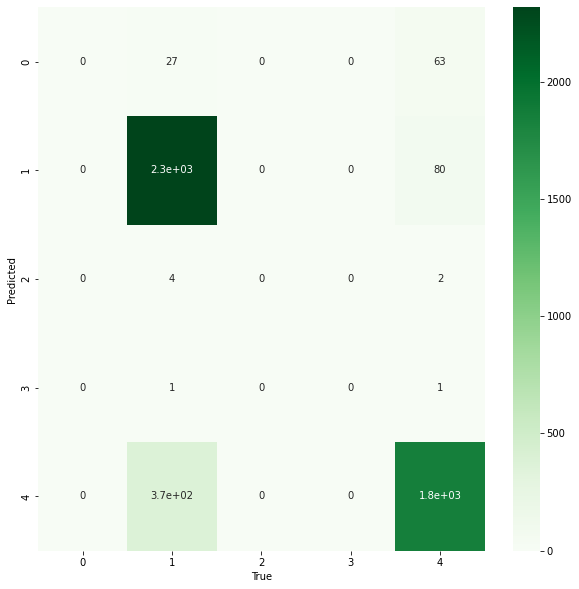

In [29]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## logistic regression

In [30]:
log_reg = LogisticRegression(C=0.05, multi_class='multinomial', solver='saga', class_weight="balanced", max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.8439686241255036
F1-score [0.36170213 0.90893653 0.0239521  0.01169591 0.8705825 ]
              precision    recall  f1-score   support

  harassment       0.27      0.57      0.36        90
non-toxicity       0.93      0.89      0.91      2397
      racism       0.01      0.33      0.02         6
    violence       0.01      0.50      0.01         2
   vulgarity       0.95      0.80      0.87      2222

    accuracy                           0.84      4717
   macro avg       0.43      0.62      0.44      4717
weighted avg       0.92      0.84      0.88      4717



## SVM

In [31]:
svm = LinearSVC(C=1.0, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9043883824464702
F1-score [0.2875817  0.94185059 0.         0.         0.90880218]
              precision    recall  f1-score   support

  harassment       0.20      0.49      0.29        90
non-toxicity       0.96      0.93      0.94      2397
      racism       0.00      0.00      0.00         6
    violence       0.00      0.00      0.00         2
   vulgarity       0.92      0.90      0.91      2222

    accuracy                           0.90      4717
   macro avg       0.42      0.46      0.43      4717
weighted avg       0.92      0.90      0.91      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-sc

# Oversampled

In [32]:
sm = SMOTE(k_neighbors=10, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
#oversampling

Resampled dataset shape Counter({'harassment': 5481, 'vulgarity': 5481, 'non-toxicity': 5481, 'violence': 5481, 'racism': 5481})


In [33]:
X_res.shape, y_res.shape, X_test.shape, y_test.shape

((27405, 33), (27405,), (4717, 33), (4717,))

## DT smote

In [34]:
'''
param_grid = {
    "min_samples_split": uniform(0.0005,0.0003),
    "min_samples_leaf": uniform(0.004, 0.001),
    "max_depth": randint(2, 150),
    "criterion": ["gini", "entropy", "log_loss"],
    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),
    #"max_leaf_nodes" : randint(80, 140),
    #"min_impurity_decrease" : uniform(0.0001, 1e0),
    "ccp_alpha" : uniform(0.002, 0.0005)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_res, y_res)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "min_samples_split": uniform(0.0005,0.0003),\n    "min_samples_leaf": uniform(0.004, 0.001),\n    "max_depth": randint(2, 150),\n    "criterion": ["gini", "entropy", "log_loss"],\n    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),\n    #"max_leaf_nodes" : randint(80, 140),\n    #"min_impurity_decrease" : uniform(0.0001, 1e0),\n    "ccp_alpha" : uniform(0.002, 0.0005)\n}\ngrid = RandomizedSearchCV(\n    DecisionTreeClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter=500,\n)\ngrid.fit(X_res, y_res)\nclf = grid.best_estimator_\n'

In [35]:
#clf

In [36]:
dt_smote = DecisionTreeClassifier(ccp_alpha=0.002220723510498376, criterion='entropy',
                       max_depth=73, min_samples_leaf=0.00475156460673439,
                       min_samples_split=0.0006895614345890984)
dt_smote.fit(X_res, y_res)

y_pred = dt_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8452406190375239
F1-score [0.25653207 0.89784834 0.07692308 0.13333333 0.86135979]
              precision    recall  f1-score   support

  harassment       0.16      0.60      0.26        90
non-toxicity       0.90      0.90      0.90      2397
      racism       0.04      0.50      0.08         6
    violence       0.08      0.50      0.13         2
   vulgarity       0.93      0.80      0.86      2222

    accuracy                           0.85      4717
   macro avg       0.42      0.66      0.45      4717
weighted avg       0.90      0.85      0.87      4717



## Random Forest

In [37]:
rf_balanced_smote = RandomForestClassifier(n_estimators=1000, 
                             criterion='entropy', 
                             min_samples_split=20, 
                             min_samples_leaf=1,  
                             max_features=None, 
                             n_jobs=-1,
                             class_weight='balanced_subsample')

rf_balanced_smote.fit(X_res, y_res)

y_pred = rf_balanced_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.892940428238287
F1-score [0.42214533 0.92272633 0.07407407 0.         0.89713086]
              precision    recall  f1-score   support

  harassment       0.31      0.68      0.42        90
non-toxicity       0.92      0.93      0.92      2397
      racism       0.05      0.17      0.07         6
    violence       0.00      0.00      0.00         2
   vulgarity       0.93      0.87      0.90      2222

    accuracy                           0.89      4717
   macro avg       0.44      0.53      0.46      4717
weighted avg       0.91      0.89      0.90      4717



# KNN

In [38]:
#Scaling only on training set for entropy reasons
norm = StandardScaler()
norm.fit(X_res)
X_train_norm = norm.transform(X_res)
X_test_norm = norm.transform(X_test)

In [39]:
'''
param_grid = {
    "n_neighbors": randint(12,60),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean", "minkowski"]
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter = 50,
)
grid.fit(X_train_norm, y_res)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "n_neighbors": randint(12,60),\n    "weights": ["uniform", "distance"],\n    "metric": ["manhattan", "euclidean", "minkowski"]\n}\n\ngrid = RandomizedSearchCV(\n    KNeighborsClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter = 50,\n)\ngrid.fit(X_train_norm, y_res)\nclf = grid.best_estimator_\n'

In [40]:
#print(grid.best_params_, grid.best_score_)

In [41]:
knn_smote = KNeighborsClassifier(n_neighbors=41, metric="manhattan", weights = "distance")
knn_smote.fit(X_train_norm, y_res)
y_pred = knn_smote.predict(X_test_norm)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.7795208819164723
F1-score [0.15194346 0.89569536 0.03191489 0.         0.78073443]
              precision    recall  f1-score   support

  harassment      0.090     0.478     0.152        90
non-toxicity      0.889     0.903     0.896      2397
      racism      0.016     0.500     0.032         6
    violence      0.000     0.000     0.000         2
   vulgarity      0.955     0.660     0.781      2222

    accuracy                          0.780      4717
   macro avg      0.390     0.508     0.372      4717
weighted avg      0.903     0.780     0.826      4717



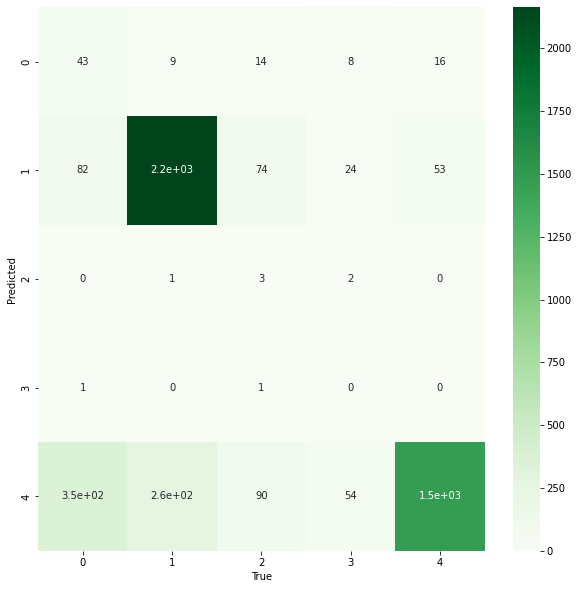

In [42]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## logistic regression

In [43]:
log_reg_smote = LogisticRegression(C=0.05, multi_class='multinomial', solver='saga', class_weight="balanced", max_iter=10000)
log_reg_smote.fit(X_res, y_res)

y_pred = log_reg_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8463006147975408
F1-score [0.32544379 0.91835871 0.05333333 0.01777778 0.86627335]
              precision    recall  f1-score   support

  harassment       0.22      0.61      0.33        90
non-toxicity       0.93      0.91      0.92      2397
      racism       0.03      0.33      0.05         6
    violence       0.01      1.00      0.02         2
   vulgarity       0.95      0.79      0.87      2222

    accuracy                           0.85      4717
   macro avg       0.43      0.73      0.44      4717
weighted avg       0.93      0.85      0.88      4717



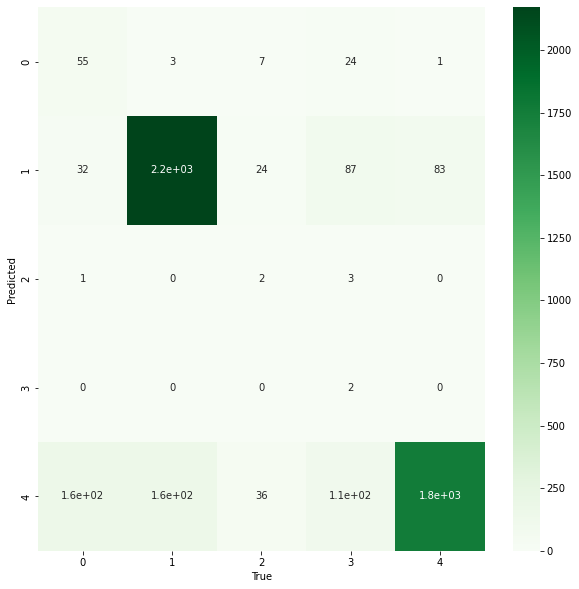

In [44]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## SVM

In [45]:
svm_smote = LinearSVC(C=1.0, random_state=42)
svm_smote.fit(X_res, y_res)

y_pred = svm_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.8390926436294255
F1-score [0.26109661 0.90206186 0.1754386  0.08163265 0.8336324 ]
              precision    recall  f1-score   support

  harassment       0.17      0.56      0.26        90
non-toxicity       0.86      0.95      0.90      2397
      racism       0.10      0.83      0.18         6
    violence       0.04      1.00      0.08         2
   vulgarity       0.97      0.73      0.83      2222

    accuracy                           0.84      4717
   macro avg       0.43      0.81      0.45      4717
weighted avg       0.90      0.84      0.86      4717



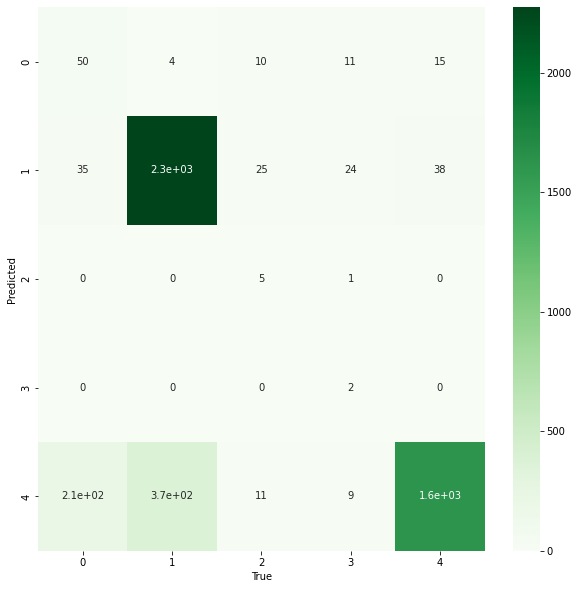

In [46]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# SHAP

Random forest con smote

In [47]:
import shap
shap.initjs()

In [48]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
X_test.shape

(4717, 33)

Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction 

In [50]:

explainer = shap.TreeExplainer(rf_balanced_smote)
shap_values = explainer.shap_values(X_test)

In [52]:
y_test.values

array(['non-toxicity', 'non-toxicity', 'vulgarity', ..., 'non-toxicity',
       'vulgarity', 'vulgarity'], dtype=object)

In [53]:
from collections import Counter

conteggio = Counter(y_test.values)

print(conteggio)

Counter({'non-toxicity': 2397, 'vulgarity': 2222, 'harassment': 90, 'racism': 6, 'violence': 2})


In [54]:
#funzione che ritorna il waterfall plot di un medoide a seconda della classe
def medoids(num, label, clust):
    df_shap = pd.DataFrame(shap_values[num], columns=features_impo)
    df_shap["toxic"] = y_test.values
    df_shap_0 = df_shap[df_shap["toxic"]==label]
    df_clust_0 = df_shap_0.drop(columns=["toxic"])
    X_0 = df_clust_0.values
    scaler = MinMaxScaler()
    X0_minmax = scaler.fit_transform(X_0)
    kmedoids_0 = KMedoids(n_clusters=clust, random_state=0)
    kmedoids_0.fit(df_clust_0)
    for i in range(0, len(kmedoids_0.medoid_indices_)):
        medoid = kmedoids_0.medoid_indices_[i]
        print(shap.plots._waterfall.waterfall_legacy(explainer.expected_value[num], df_clust_0.iloc[medoid].values, feature_names = X_test.columns,max_display=10))

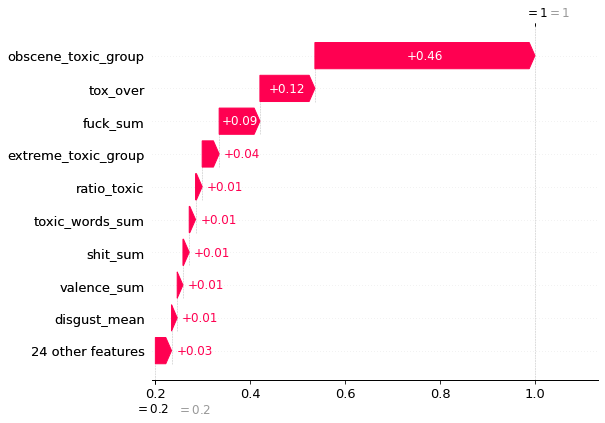

None


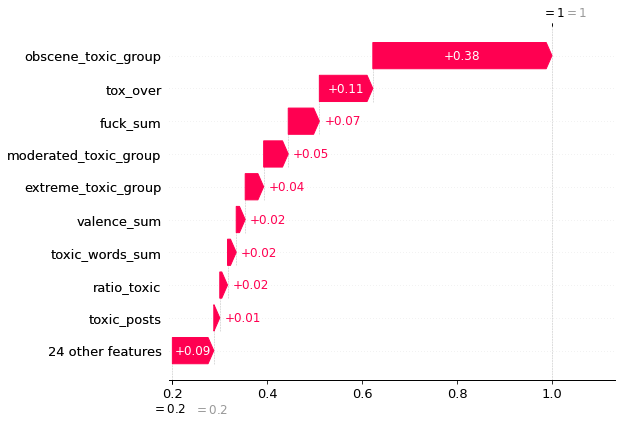

None


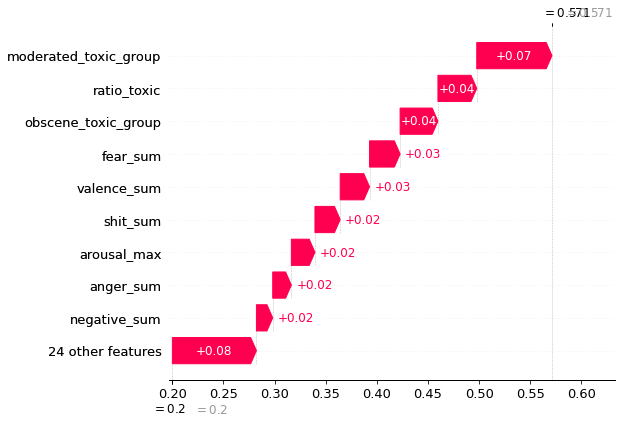

None


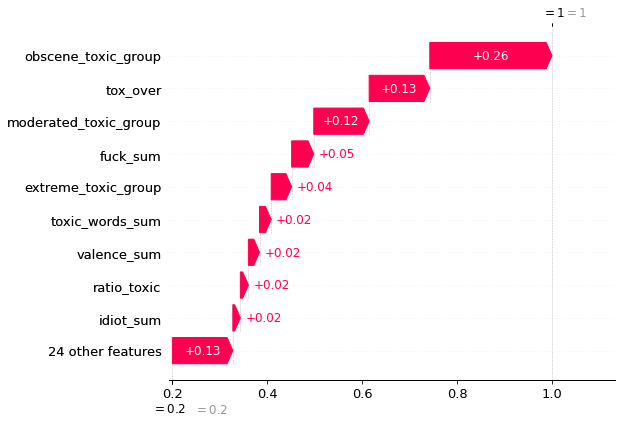

None


In [63]:
#0 -> harassment
#1 -> non-toxicity
#2 -> racism
#3 -> violence
#4 -> vulgarity
medoids(4, "vulgarity", 4)

## global

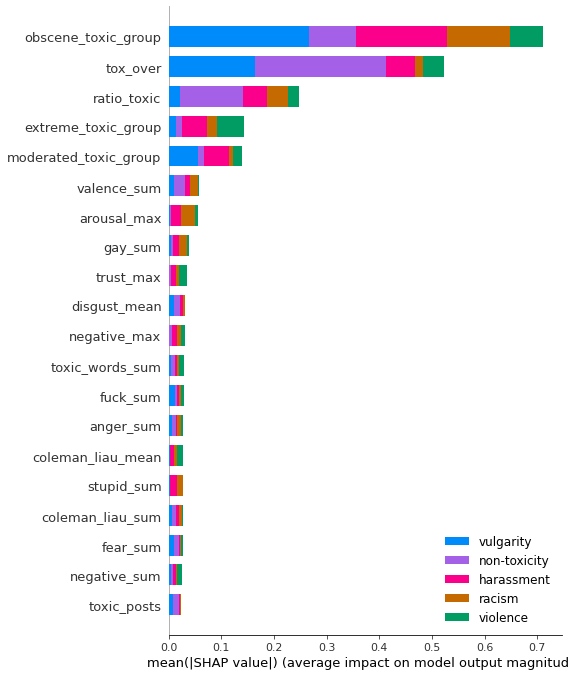

CPU times: user 23min 42s, sys: 7.78 s, total: 23min 50s
Wall time: 23min 52s


In [56]:
%%time
#SUMMARY PLOT
class_names = ["harassment","non-toxicity","racism","violence","vulgarity"]

explainer = shap.TreeExplainer(rf_balanced_smote)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test.values, plot_type="bar", class_names=class_names, feature_names = X_test.columns)


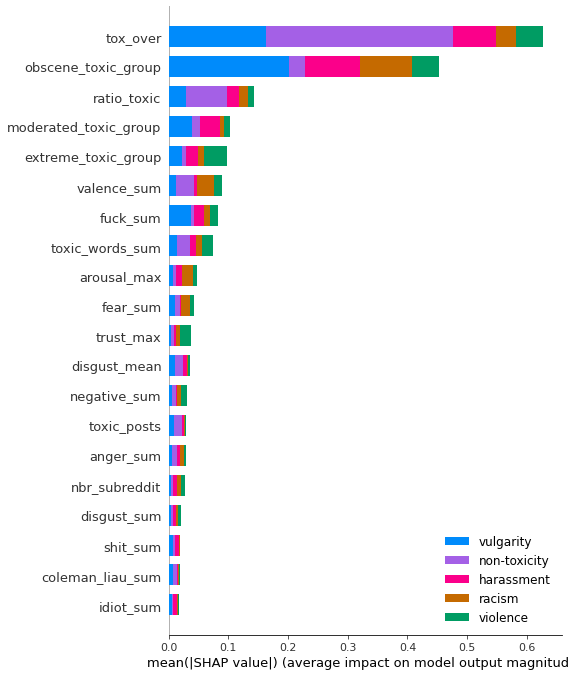

CPU times: user 9min 25s, sys: 2.96 s, total: 9min 28s
Wall time: 9min 28s


In [57]:
%%time
#SUMMARY PLOT
class_names = ["harassment","non-toxicity","racism","violence","vulgarity"]

explainer = shap.TreeExplainer(rf_balanced)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test.values, plot_type="bar", class_names=class_names, feature_names = X_test.columns)
